
# TimeSeries Clustering with tslearn Python library

**tslearn** is a general-purpose Python machine learning library for time series that offers tools for pre-processing and feature extraction as well as dedicated models for clustering, classification and regression. 

It follows scikit-learn’s Application Programming Interface for transformers and estimators, allowing the use of standard pipelines and model selection
tools on top of tslearn objects.  

It is distributed under the BSD-2-Clause license, and its
source code is available at https://github.com/tslearn-team/tslearn.

#### Author: [Romain Tavenard et.al.](https://www.jmlr.org/papers/volume21/20-091/20-091.pdf)

---  
Source:
+ [TSLEARN Gallery](https://tslearn.readthedocs.io/en/latest/auto_examples/clustering/plot_kmeans.html#sphx-glr-auto-examples-clustering-plot-kmeans-py)   
+ [tslearn.TimeSeriesKMeans Clustering](https://tslearn.readthedocs.io/en/stable/gen_modules/clustering/tslearn.clustering.TimeSeriesKMeans.html)


History: 
*  v1, May 2023, dbe --- initial version for BINA FS23

---
  

In [1]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.2/358.2 kB 13.5 MB/s eta 0:00:00


In [2]:
import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler

### A note on Pre-Processing
In this example, time series are preprocessed using  TimeSeriesScalerMeanVariance. This scaler is such that each output time series has zero mean and unit variance. The assumption here is that the range of a given time series is uninformative and one only wants to compare shapes in an amplitude-invariant manner (when time series are multivariate, this also rescales all modalities such that there will not be a single modality responsible for a large part of the variance). This means that one cannot scale barycenters back to data range because each time series is scaled independently and there is hence no such thing as an overall data range.

*Source: F. Petitjean, A. Ketterlin & P. Gancarski. A global averaging method for dynamic time warping, with applications to clustering. Pattern Recognition, Elsevier, 2011, Vol. 44, Num. 3, pp. 678-693 [2] M. Cuturi, M. Blondel “Soft-DTW: a Differentiable Loss Function for Time-Series,” ICML 2017.*

### Generate set of random time series, transform and cut time series for further processing


X train size:   27500 
X train shape:  (100, 275, 1) 
X train lenght: 100


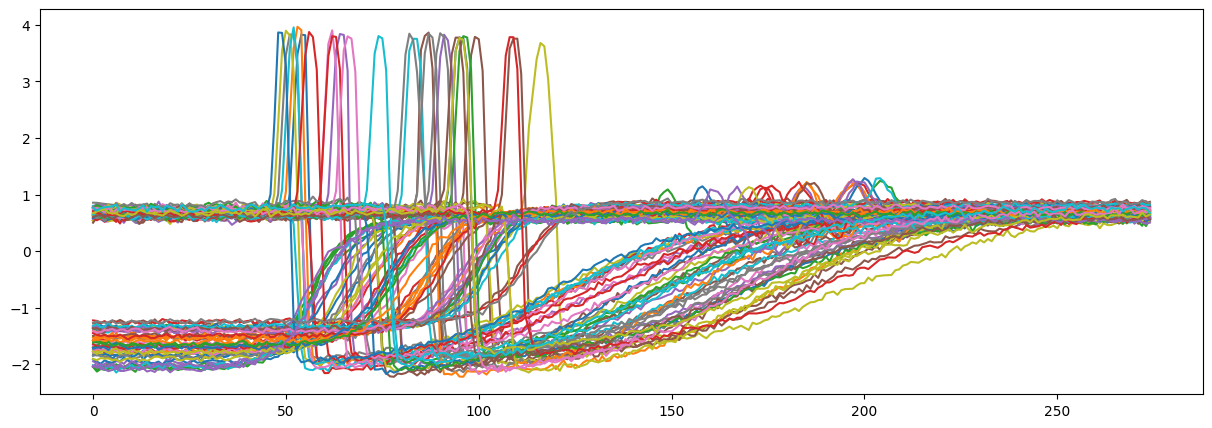

In [9]:
seed = 1000
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")

plt.figure(figsize=(15,5))
print("X train size:  ",X_train.size, "\nX train shape: ", X_train.shape, "\nX train lenght:", len(X_train))
for yi in range(len(X_train)): plt.plot(X_train[yi])

X_train = X_train[y_train < 4]  # Keep first 3 classes
numpy.random.shuffle(X_train)

# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])

# Make time series shorter
X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]

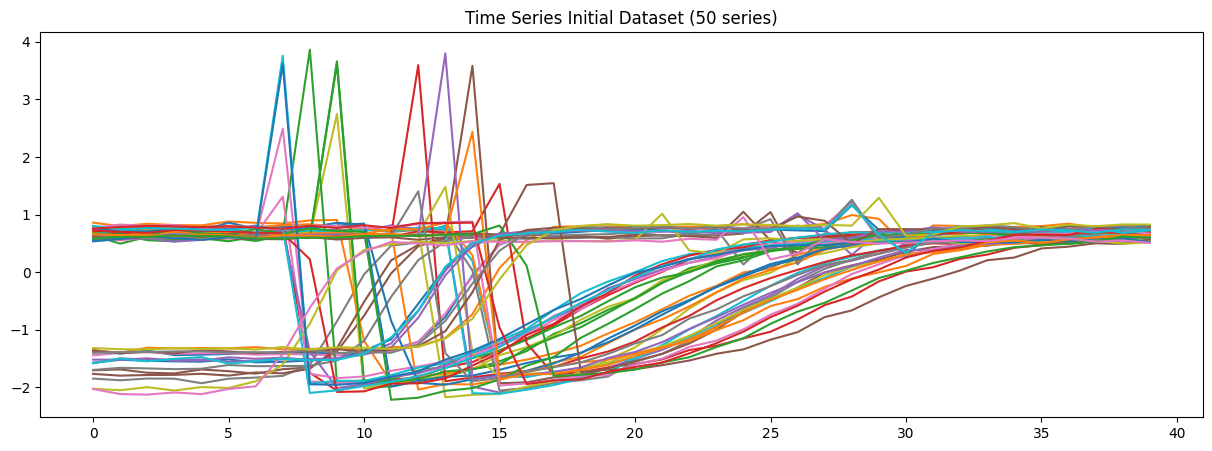

In [11]:
# plot time series data sequence
plt.figure(figsize=(15,5))
plt.title("Time Series Initial Dataset (50 series)")

for yi in range(50):
  plt.plot(X_train[yi])

---  
### A) kMeans Clustering with **euclidean** metric 

Euclidean k-means
19.432 --> 7.743 --> 7.665 --> 7.622 --> 7.622 --> 


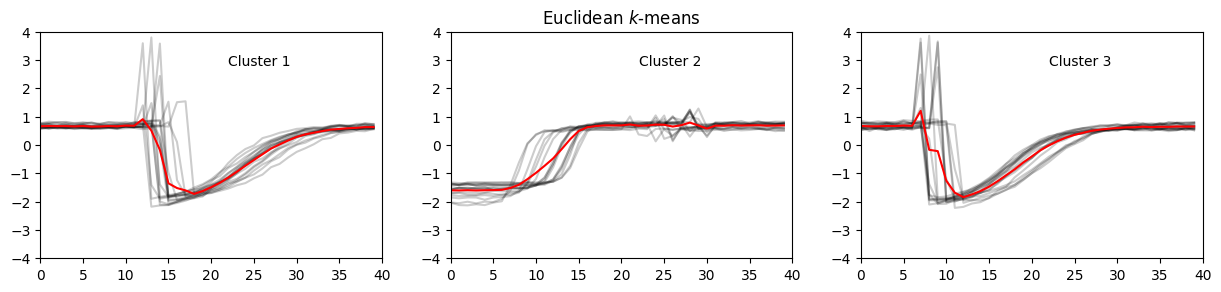

In [5]:
# Euclidean k-means
print("Euclidean k-means")
eucl_km = TimeSeriesKMeans(n_clusters=3,
                           metric="euclidean",
                           verbose=True,
                           random_state=seed)
y_pred = eucl_km.fit_predict(X_train)

plt.figure(figsize=(15,10))

for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(eucl_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

---  
### B) kMeans Clustering with **dba** (DTW Barycenter Averaging) metric   

DTW = **dynamic time warping**, a similarity measure between time series.  
see [tslearn doc](https://tslearn.readthedocs.io/en/stable/user_guide/dtw.html) for more info

DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


0.608 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

0.445 --> 0.445 --> 
Init 2
1.160 --> 0.440 --> 0.440 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


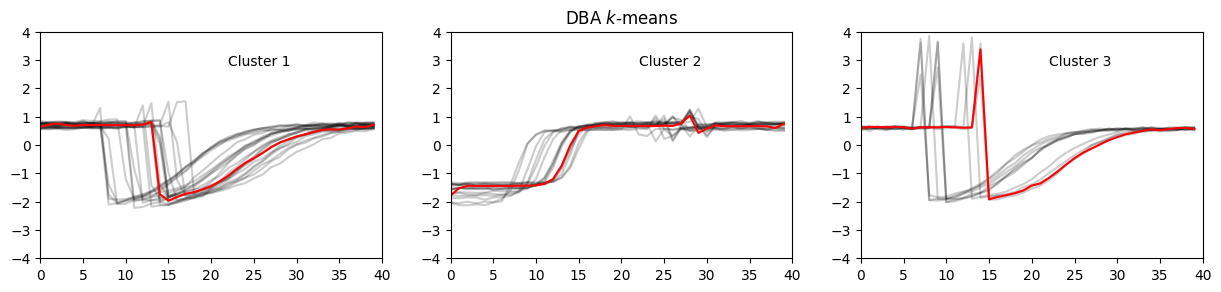

In [6]:
# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred = dba_km.fit_predict(X_train)

plt.figure(figsize=(15,10))
for yi in range(3):
    plt.subplot(3, 3, 4 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

---  
### C) kMeans Clustering with **soft dtw** metric 

Soft-DTW k-means
0.533 --> 0.134 --> 0.134 --> 0.134 --> 0.134 --> 0.134 --> 0.134 --> 0.134 --> 0.134 --> 0.134 --> 0.134 --> 0.134 --> 0.134 --> 0.134 --> 0.134 --> 0.134 --> 0.134 --> 0.134 --> 0.134 --> 0.134 --> 0.134 --> 0.134 --> 0.134 --> 0.134 --> 0.134 --> 0.134 --> 0.134 --> 0.134 --> 


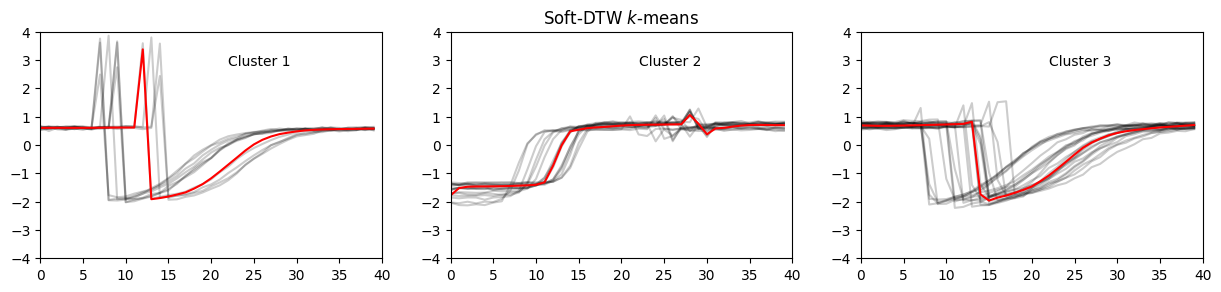

In [7]:
# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=3,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)

plt.figure(figsize=(15,10))
for yi in range(3):
    plt.subplot(3, 3, 7 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

# plt.tight_layout()
# plt.show()